Dataset Overview:
             Type    Region   Terrain Type  Max Altitude (ft)  \
0          Attack  Mountain  High Altitude              20000   
1         Utility    Desert           Flat              15000   
2  Reconnaissance    Forest   Dense Forest              12000   
3       Transport     Urban          Urban              18000   
4          Attack   Coastal        Coastal              16000   

   Max Speed (km/h)  Combat Range (km)  Payload Capacity (kg)  Threat Level  \
0               280                500                   2000             2   
1               250                600                   1500             3   
2               220                400                   1000             1   
3               240                550                   1800             4   
4               260                580                   1600             2   

  Suggested Helicopter Type  
0              AH-64 Apache  
1          UH-60 Black Hawk  
2               OH-58 Kiow

C:\Users\jagda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jagda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jagda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jagda\anaconda3\Lib\site-packages\sklea

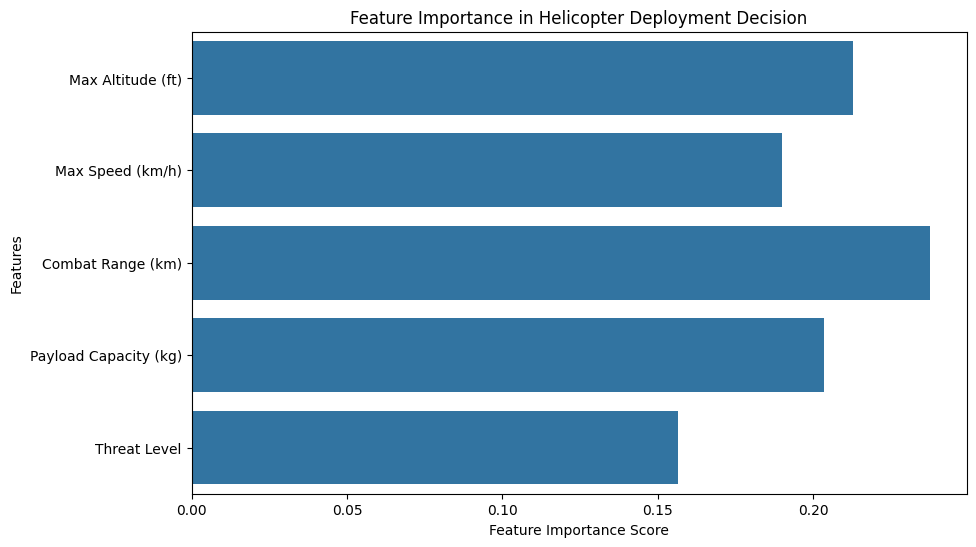

Predicted Helicopter Type: AH-64 Apache


C:\Users\jagda\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [3]:
import pandas as pd  # Used for data manipulation and analysis
import matplotlib.pyplot as plt  # Used for data visualization (plots and graphs)
import seaborn as sns  # Advanced visualization library based on Matplotlib
from sklearn.model_selection import train_test_split  # Splits dataset into training and testing sets
from sklearn.ensemble import RandomForestClassifier  # Machine Learning model for classification
from sklearn.preprocessing import LabelEncoder  # Converts categorical data into numerical form
from sklearn.metrics import accuracy_score, classification_report  # Evaluates model performance

# Load dataset
file_path = "army_helicopter_distribution_corrected.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Display basic information
print("Dataset Overview:")
print(df.head())
print(df.info())

# Ensure only existing categorical columns are encoded
label_encoders = {}
categorical_columns = ['Type', 'Region', 'Terrain Type', 'Suggested Helicopter Type']
categorical_columns = [col for col in categorical_columns if col in df.columns]

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Check actual column names to avoid KeyError
print("Available columns:", df.columns.tolist())

# Splitting data into training and testing
X_columns = ['Max Altitude (ft)', 'Max Speed (km/h)', 'Combat Range (km)', 'Payload Capacity (kg)']
if 'Threat Level' in df.columns:
    X_columns.append('Threat Level')

X = df[X_columns]

if 'Suggested Helicopter Type' in df.columns:
    y = df['Suggested Helicopter Type']
else:
    print("Warning: 'Suggested Helicopter Type' column is missing from the dataset.")
    exit()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Machine Learning Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Model evaluation
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature Importance Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Helicopter Deployment Decision")
plt.show()

# Predict helicopter type for a new location
def predict_helicopter(max_altitude, max_speed, combat_range, payload, threat_level=None):
    new_data = [[max_altitude, max_speed, combat_range, payload]]
    if 'Threat Level' in df.columns:
        new_data[0].append(threat_level)
    prediction = model.predict(new_data)
    return label_encoders['Suggested Helicopter Type'].inverse_transform(prediction)[0] if 'Suggested Helicopter Type' in label_encoders else "Prediction unavailable"

# Example prediction
if 'Suggested Helicopter Type' in label_encoders:
    print("Predicted Helicopter Type:", predict_helicopter(20000, 280, 500, 2000, 20))


In [1]:
import pandas as pd

# Hardcoded data with location-wise national security information
data = [
    # Location, State/Region, Latitude, Longitude, Elevation (m), ProximityToBorder (km), ThreatLevel
    ["Leh", "Ladakh", 34.1526, 77.5771, 3500, 5, "High"],
    ["Tawang", "Arunachal Pradesh", 27.5867, 91.8663, 3048, 15, "High"],
    ["Uri", "Jammu & Kashmir", 34.0757, 74.0459, 1580, 2, "High"],
    ["Doklam", "Sikkim", 27.3175, 88.9111, 4300, 1, "High"],
    ["Siachen Glacier", "J&K", 35.5154, 77.0951, 5400, 0, "High"],
    ["Gurez Valley", "J&K", 34.6403, 74.7083, 2560, 10, "Medium"],
    ["Chushul", "Ladakh", 33.6505, 78.6711, 4365, 2, "High"],
    ["Pangong Tso", "Ladakh", 33.7492, 78.7747, 4250, 0.5, "High"],
    ["Nathu La", "Sikkim", 27.3866, 88.8308, 4310, 3, "High"],
    ["Andaman Nicobar", "Andaman & Nicobar", 11.7401, 92.6586, 30, 1200, "Medium"],
    ["INS Kadamba", "Karnataka", 14.8054, 74.1161, 10, 100, "Medium"],
    ["Sir Creek", "Gujarat", 23.9865, 68.9348, 2, 1, "High"],
    ["Jaisalmer", "Rajasthan", 26.9157, 70.9083, 229, 20, "High"],
    ["Tezpur", "Assam", 26.6279, 92.8001, 73, 80, "Medium"],
    ["Pathankot", "Punjab", 32.2643, 75.6521, 330, 25, "High"]
]

# Convert to DataFrame
df = pd.DataFrame(data, columns=[
    "Location", "State/Region", "Latitude", "Longitude", "Elevation (m)",
    "ProximityToBorder (km)", "ThreatLevel"
])

# Function to recommend helicopters and jets based on criteria
def recommend_assets(elevation, threat, region):
    recommendations = []

    # High threat areas
    if threat == "High":
        if elevation > 4000:
            recommendations += ["HAL Prachand", "HAL Dhruv (High Altitude)", "Su-30MKI"]
        elif elevation > 2000:
            recommendations += ["HAL Rudra", "Mi-17 V5", "Tejas Mk1A"]
        else:
            recommendations += ["Apache AH-64E", "Tejas Mk1A", "Jaguar"]

    # Medium threat areas
    elif threat == "Medium":
        if elevation > 4000:
            recommendations += ["HAL Dhruv (High Altitude)"]
        elif elevation > 2000:
            recommendations += ["HAL Rudra"]
        else:
            recommendations += ["ALH Dhruv"]

    # Special attention for naval regions
    if "Andaman" in region or "INS" in region:
        recommendations += ["MH-60R Seahawk", "MiG-29K", "INS Vikrant-based Tejas Naval"]

    return list(set(recommendations))

# Apply recommendation logic
df["RecommendedAssets"] = df.apply(
    lambda row: recommend_assets(row["Elevation (m)"], row["ThreatLevel"], row["Location"]),
    axis=1
)

# Display the final data
print(df.to_string(index=False))


       Location      State/Region  Latitude  Longitude  Elevation (m)  ProximityToBorder (km) ThreatLevel                                                   RecommendedAssets
            Leh            Ladakh   34.1526    77.5771           3500                     5.0        High                                   [HAL Rudra, Tejas Mk1A, Mi-17 V5]
         Tawang Arunachal Pradesh   27.5867    91.8663           3048                    15.0        High                                   [HAL Rudra, Tejas Mk1A, Mi-17 V5]
            Uri   Jammu & Kashmir   34.0757    74.0459           1580                     2.0        High                                 [Jaguar, Tejas Mk1A, Apache AH-64E]
         Doklam            Sikkim   27.3175    88.9111           4300                     1.0        High                 [Su-30MKI, HAL Prachand, HAL Dhruv (High Altitude)]
Siachen Glacier               J&K   35.5154    77.0951           5400                     0.0        High                 [Su-30MK

# GUI

In [ ]:
import tkinter as tk
from tkinter import ttk, messagebox
import pickle

# Load dataset
with open("HS model.pkl", "rb") as f:
    data = pickle.load(f)

# Advanced recommendation logic
def recommend_assets(elevation, threat, region, terrain_type, border_proximity, weather, insurgency_level):
    rec = []

    # Define asset pools
    attack_helis_high_alt = ["HAL Prachand (LCH)", "HAL Rudra", "HAL Dhruv Mk3 (ALH)", "HAL Cheetah"]
    attack_helis_med_alt = ["HAL Rudra", "Apache AH-64E", "Mi-17 V5", "HAL Dhruv"]
    attack_helis_low_alt = ["Apache AH-64E", "HAL Rudra", "HAL Dhruv", "Mi-17 V5", "HAL Chetak"]

    stealth_assets = ["Rafale", "Tejas Mk1A", "DRDO Ghatak (Future UCAV)", "Su-57 (Planned)", "MQ-28 Ghost Bat"]
    fighter_high = ["Tejas Mk1A", "Su-30MKI", "Mirage 2000", "Rafale", "MiG-29UPG"]
    fighter_low = ["Jaguar DARIN III", "Tejas Mk1A", "MiG-21 Bison"]

    surveillance = ["Netra AEW&C", "Heron UAV", "Rustom-II UAV", "Tapas UAV", "SpyLite UAV"]
    ew_assets = ["DRDO DARE", "RAWS", "DRDO Tarang", "EL/M-2060P Radar Pod"]
    ucav = ["DRDO Ghatak (Future UCAV)", "Sea Guardian MQ-9B", "IAI Harop"]

    naval_assets = [
        "MH-60R Seahawk", "P-8I Poseidon", "MiG-29K",
        "Kamov Ka-31", "HAL Dhruv Naval", "Tejas Naval Mk1", "Sea Guardian MQ-9B"
    ]

    strategic_assets = [
        "BrahMos-equipped Su-30MKI", "AWACS", "Agni-V ISR Satellite Feed",
        "Pinaka MLRS", "BrahMos NG", "Shaurya Missile (Support)"
    ]

    # Threat scoring
    threat_score = {"High": 4, "Medium": 2, "Low": 1}.get(threat, 1)
    insurgency_score = {"Severe": 3, "Moderate": 2, "Low": 1}.get(insurgency_level, 1)
    border_score = 3 if border_proximity else 1

    # Weather impact
    weather_penalty_map = {"snow": 0.4, "fog": 0.5, "storm": 0.6, "clear": 1.0}
    weather_penalty = weather_penalty_map.get(weather.lower(), 1.0)

    # Threat Intelligence Index
    cti = (threat_score * 2 + insurgency_score + border_score) * weather_penalty

    # Logic based on CTI
    if cti >= 8:
        rec += (
            attack_helis_high_alt
            + fighter_high
            + stealth_assets
            + transport_heavy
            + surveillance
            + ew_assets
            + strategic_assets
            + ucav
        )
    elif 5 <= cti < 8:
        rec += (
            attack_helis_med_alt
            + fighter_high
            + ew_assets
            + surveillance
            + ucav
        )
    else:
        rec += (
            attack_helis_low_alt
            + fighter_low
            + surveillance
        )

    # Elevation logic
    if elevation > 4000:
        rec += ["HAL Cheetah", "HAL Dhruv Mk3 (ALH)", "C-130J Super Hercules", "SpyLite UAV"]
    elif elevation > 2000:
        rec += ["HAL Rudra", "Mi-17 V5"]
    else:
        rec += ["HAL Chetak", "Jaguar DARIN III"]

    # Terrain-based logic
    if terrain_type.lower() in ["mountain", "hilly"]:
        rec += ["HAL Cheetah", "HAL Dhruv Mk3 (ALH)", "Netra AEW&C"]
    elif terrain_type.lower() == "desert":
        rec += ["Jaguar DARIN III", "Rafale", "Heron UAV"]
    elif terrain_type.lower() == "jungle":
        rec += ["HAL Rudra", "Apache AH-64E", "Heron UAV", "Tapas UAV"]
    elif terrain_type.lower() == "plains":
        rec += ["Mi-17 V5", "Su-30MKI", "Pinaka MLRS"]

    # Maritime consideration
    if any(word in region for word in ["Andaman", "Nicobar", "INS", "Naval", "Port", "Coast"]):
        rec += naval_assets + ["Sea Guardian MQ-9B", "P-8I Poseidon"]

    return sorted(set(rec))

# GUI setup
root = tk.Tk()
root.title("🇮🇳 Strategic Aircraft & Asset Recommendation System")
root.geometry("950x800")
root.configure(bg="#0f172a")

# Styling
style = ttk.Style()
style.configure("TButton", font=("Arial", 12), padding=6)
style.configure("TLabel", background="#0f172a", foreground="white", font=("Segoe UI", 11))
style.configure("TCombobox", font=("Segoe UI", 11))

# Strategic Location
ttk.Label(root, text="🎯 Select Strategic Location:").pack(pady=6)
combo = ttk.Combobox(root, values=sorted(data.keys()), width=80, state="readonly")
combo.pack(pady=5)

# Inputs
fields = {
    "Terrain Type (Mountain / Desert / Jungle / Plains)": "terrain",
    "Near International Border? (yes / no)": "border",
    "Current Weather (Clear / Snow / Fog / Storm)": "weather",
    "Insurgency Level (Low / Moderate / Severe)": "insurgency"
}

entries = {}
for label, key in fields.items():
    ttk.Label(root, text=label).pack(pady=4)
    entry = ttk.Entry(root, width=60)
    entry.pack()
    entries[key] = entry

# Output
output = tk.Text(root, height=25, width=110, wrap="word", bg="#e2e8f0", fg="#1e293b", font=("Consolas", 10))
output.pack(pady=10)

# Action
def show_recommendations():
    location = combo.get()
    if not location:
        messagebox.showwarning("Missing Location", "Please select a location.")
        return

    try:
        elevation, threat, region = data[location]
        terrain_type = entries["terrain"].get().strip()
        border_proximity = entries["border"].get().strip().lower() == "yes"
        weather = entries["weather"].get().strip()
        insurgency_level = entries["insurgency"].get().strip()

        if not all([terrain_type, weather, insurgency_level]):
            messagebox.showwarning("Incomplete Intelligence", "Please complete all fields.")
            return

        assets = recommend_assets(
            elevation, threat, region,
            terrain_type, border_proximity, weather, insurgency_level
        )

        output.delete("1.0", tk.END)
        output.insert(tk.END, f"📍 Strategic Location: {location}\n")
        output.insert(tk.END, f"⚠️ Threat Level: {threat}\n")
        output.insert(tk.END, f"🗻 Elevation: {elevation} m\n")
        output.insert(tk.END, f"🌐 Region: {region}\n")
        output.insert(tk.END, f"🧭 Terrain: {terrain_type}\n")
        output.insert(tk.END, f"🚩 Near Border: {'Yes' if border_proximity else 'No'}\n")
        output.insert(tk.END, f"🌦️ Weather: {weather}\n")
        output.insert(tk.END, f"🔥 Insurgency Level: {insurgency_level}\n\n")
        output.insert(tk.END, "✅ Recommended Combat-Ready Strategic Assets:\n\n")

        for asset in assets:
            output.insert(tk.END, f"• {asset}\n")

    except Exception as e:
        messagebox.showerror("Error", f"Something went wrong:\n{e}")

# Button
ttk.Button(root, text="🔍 Analyze & Recommend", command=show_recommendations).pack(pady=10)

# Run app
root.mainloop()


## Map Dashboard (Streamlit + Folium)

# Prompt

In [4]:
# Helicopter Management System

class Helicopter:
    def __init__(self, id, name):
        self.id = id
        self.name = name
        self.location = None

    def assign_location(self, location):
        self.location = location

    def __str__(self):
        return f"[ID: {self.id}] {self.name} — Location: {self.location if self.location else 'Not Assigned'}"


class HelicopterFleet:
    def __init__(self):
        self.helicopters = []

    def add_helicopter(self, name):
        new_id = len(self.helicopters) + 1
        helicopter = Helicopter(new_id, name)
        self.helicopters.append(helicopter)
        print(f"✅ Helicopter '{name}' added with ID {new_id}.")

    def assign_helicopter_to_location(self, helicopter_id, location):
        for heli in self.helicopters:
            if heli.id == helicopter_id:
                heli.assign_location(location)
                print(f"📍 Helicopter '{heli.name}' assigned to '{location}'.")
                return
        print("❌ Helicopter not found.")

    def show_fleet(self):
        if not self.helicopters:
            print("🚫 No helicopters in the fleet yet.")
        else:
            print("\n🚁 Helicopter Fleet Status:")
            for heli in self.helicopters:
                print(heli)


def main():
    fleet = HelicopterFleet()

    while True:
        print("\n--- Helicopter Fleet Management ---")
        print("1. Add New Helicopter")
        print("2. Assign Helicopter to Location")
        print("3. Show All Helicopters")
        print("4. Exit")

        choice = input("Enter your choice (1-4): ")

        if choice == "1":
            name = input("Enter helicopter name: ")
            fleet.add_helicopter(name)

        elif choice == "2":
            try:
                heli_id = int(input("Enter helicopter ID to assign: "))
                location = input("Enter location: ")
                fleet.assign_helicopter_to_location(heli_id, location)
            except ValueError:
                print("❌ Invalid input. Please enter a valid ID.")

        elif choice == "3":
            fleet.show_fleet()

        elif choice == "4":
            print("👋 Exiting Helicopter Fleet Management. Goodbye!")
            break

        else:
            print("❌ Invalid choice. Please select between 1-4.")

if __name__ == "__main__":
    main()



--- Helicopter Fleet Management ---
1. Add New Helicopter
2. Assign Helicopter to Location
3. Show All Helicopters
4. Exit


Enter your choice (1-4):  3


🚫 No helicopters in the fleet yet.

--- Helicopter Fleet Management ---
1. Add New Helicopter
2. Assign Helicopter to Location
3. Show All Helicopters
4. Exit


Enter your choice (1-4):  1
Enter helicopter name:  Apachi


✅ Helicopter 'Apachi' added with ID 1.

--- Helicopter Fleet Management ---
1. Add New Helicopter
2. Assign Helicopter to Location
3. Show All Helicopters
4. Exit


Enter your choice (1-4):  1
Enter helicopter name:  LCA


✅ Helicopter 'LCA' added with ID 2.

--- Helicopter Fleet Management ---
1. Add New Helicopter
2. Assign Helicopter to Location
3. Show All Helicopters
4. Exit


Enter your choice (1-4):  3



🚁 Helicopter Fleet Status:
[ID: 1] Apachi — Location: Not Assigned
[ID: 2] LCA — Location: Not Assigned

--- Helicopter Fleet Management ---
1. Add New Helicopter
2. Assign Helicopter to Location
3. Show All Helicopters
4. Exit


Enter your choice (1-4):  2
Enter helicopter ID to assign:  2
Enter location:  URI


📍 Helicopter 'LCA' assigned to 'URI'.

--- Helicopter Fleet Management ---
1. Add New Helicopter
2. Assign Helicopter to Location
3. Show All Helicopters
4. Exit


Enter your choice (1-4):  3



🚁 Helicopter Fleet Status:
[ID: 1] Apachi — Location: Not Assigned
[ID: 2] LCA — Location: URI

--- Helicopter Fleet Management ---
1. Add New Helicopter
2. Assign Helicopter to Location
3. Show All Helicopters
4. Exit


Enter your choice (1-4):  4


👋 Exiting Helicopter Fleet Management. Goodbye!
